<a href="https://colab.research.google.com/github/Callum-Betcity/fastai/blob/main/porsche_volia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'ec97d2f43b8e467d8a4ef0f56c6351ac')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'porsche')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
dest = 'images/porsche.jpg'
download_url(ims[0], dest)

Path('images/porsche.jpg')

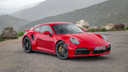

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
car_types = 'porsche','beatle','toy'
path = Path('cars')

In [9]:
if not path.exists():
    path.mkdir()
    for o in car_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} car')
        download_images(dest, urls=results.attrgot('contentUrl'))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [10]:
# check folder has files as expected
fns = get_image_files(path)
fns

(#434) [Path('cars/toy/077b8f78-4ca7-4351-8a98-1b9e5c6b331e.jpeg'),Path('cars/toy/65cc7c0e-1e27-4ba7-9fce-a2258a63eb8e.jpeg'),Path('cars/toy/1fc4b880-e024-4dd6-a41f-8ee22d48fb2c.jpeg'),Path('cars/toy/f5db2eb8-5d85-4434-9aab-b716f747279a.jpg'),Path('cars/toy/c80c64e2-7f53-464f-9daf-00f3c5a210aa.jpg'),Path('cars/toy/4196f166-96c3-498d-ad58-ea4ac2e07d2f.jpg'),Path('cars/toy/12f65aad-bcbb-4c81-94d5-86e17e616dad.jpg'),Path('cars/toy/cc3ec22f-d5d0-4073-9de6-79399314f45f.jpeg'),Path('cars/toy/d24023f4-28b7-4cfc-b121-8bda424c0fdc.jpg'),Path('cars/toy/03024c74-382b-43f0-b365-e3990c412118.jpeg')...]

In [11]:
# check corrupted files
failed = verify_images(fns)
failed

(#9) [Path('cars/toy/9dd38604-311c-46ee-902f-24e628f872f4.jpg'),Path('cars/toy/97712e01-2c26-4bc0-ad77-f4278adcc163.jpg'),Path('cars/toy/0f4a4905-5038-4b3c-b058-9d0d74b0eb2a.jpg'),Path('cars/porsche/c4e56d64-9143-429e-991d-c680416f7b7f.jpg'),Path('cars/porsche/d16ca30f-6f9c-4ef1-9924-3268e3fe4be1.jpg'),Path('cars/porsche/6cbfc056-8fa8-4836-950c-c41046005952.jpg'),Path('cars/beatle/0c9c6a93-fde4-4945-9bf7-8658052e816e.jpg'),Path('cars/beatle/f84b66cd-3b28-46cb-8de6-cdd103140dfd.jpg'),Path('cars/beatle/6148348d-4d42-46b7-b998-5b363387d1bc.jpg')]

In [12]:
# remove corrupted images
failed.map(Path.unlink);

In [13]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
dls = cars.dataloaders(path)

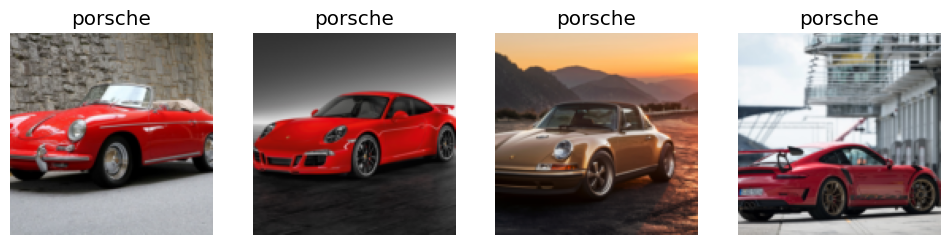

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)

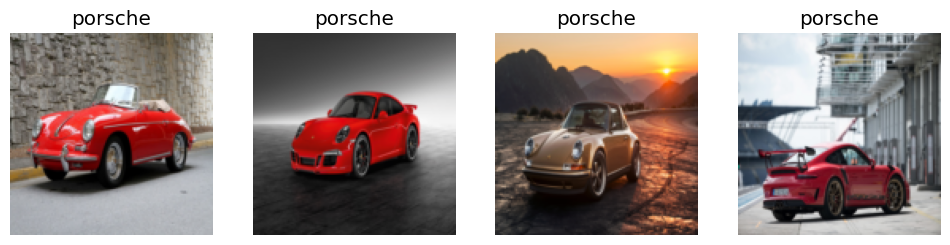

In [17]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

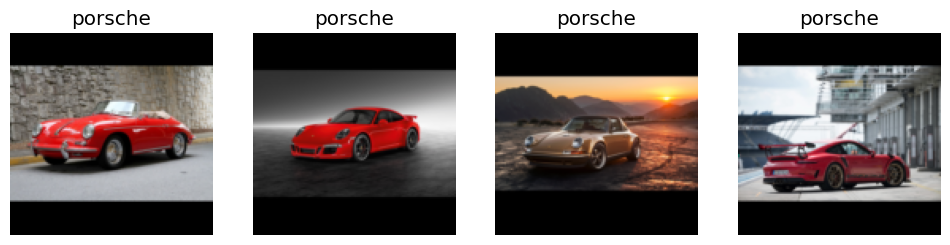

In [18]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

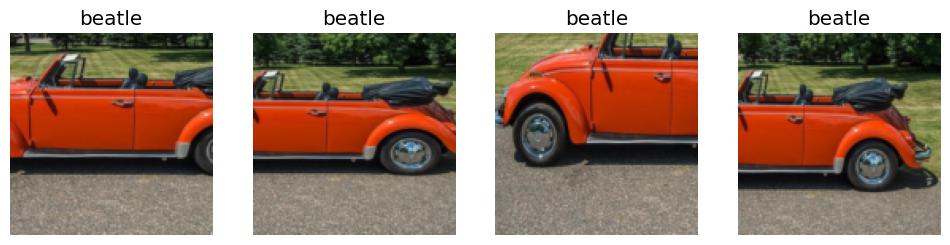

In [19]:
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

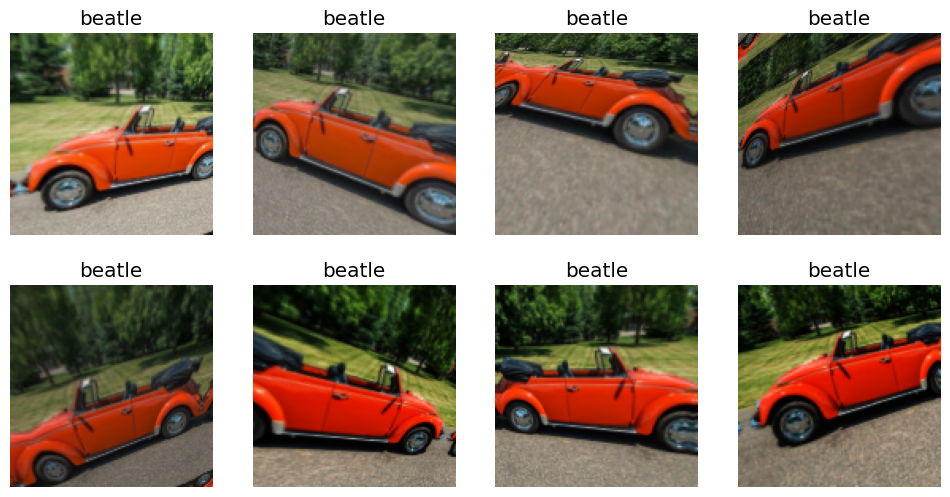

In [20]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


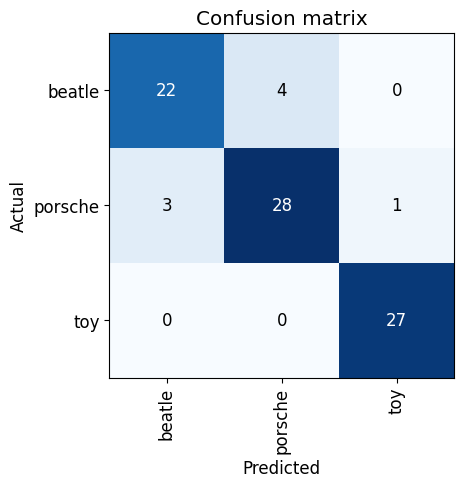

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


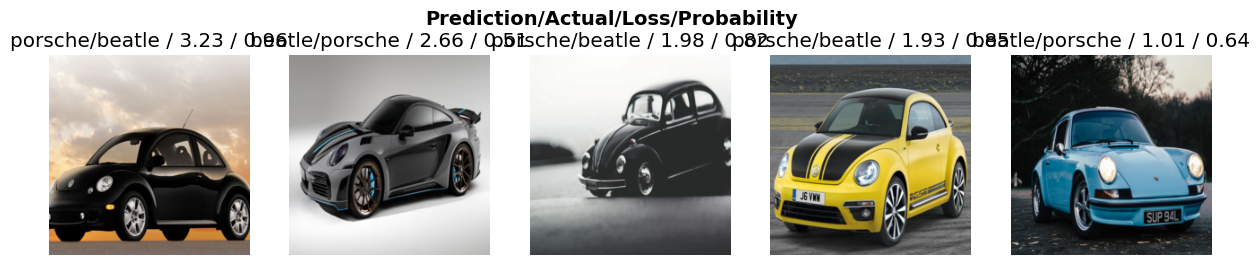

In [25]:
# prediction, actual (target label), loss, and probability
interp.plot_top_losses(5, nrows=1)

In [26]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [27]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [28]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [32]:
learn_inf.predict('images/porsche.jpg')

('porsche', tensor(1), tensor([2.6263e-03, 9.9726e-01, 1.1679e-04]))

In [33]:
learn_inf.dls.vocab

['beatle', 'porsche', 'toy']

In [34]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)

In [38]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: beatle; Probability: 0.9563')

In [39]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [40]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [41]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [43]:
#hide_output
VBox([widgets.Label('Select your car!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [44]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.0/920.0 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attemptin